In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind, ttest_rel
import scipy.stats as stats


In [2]:
# Load the dataset
dataset = pd.read_csv("Automobilecodedata.csv")


In [3]:
# Check for missing values
print(dataset.isnull().sum())


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
name            0
origin          0
dtype: int64


In [4]:
# Drop 'sl_no' column
dataset.drop('displacement', inplace=True, axis=1)


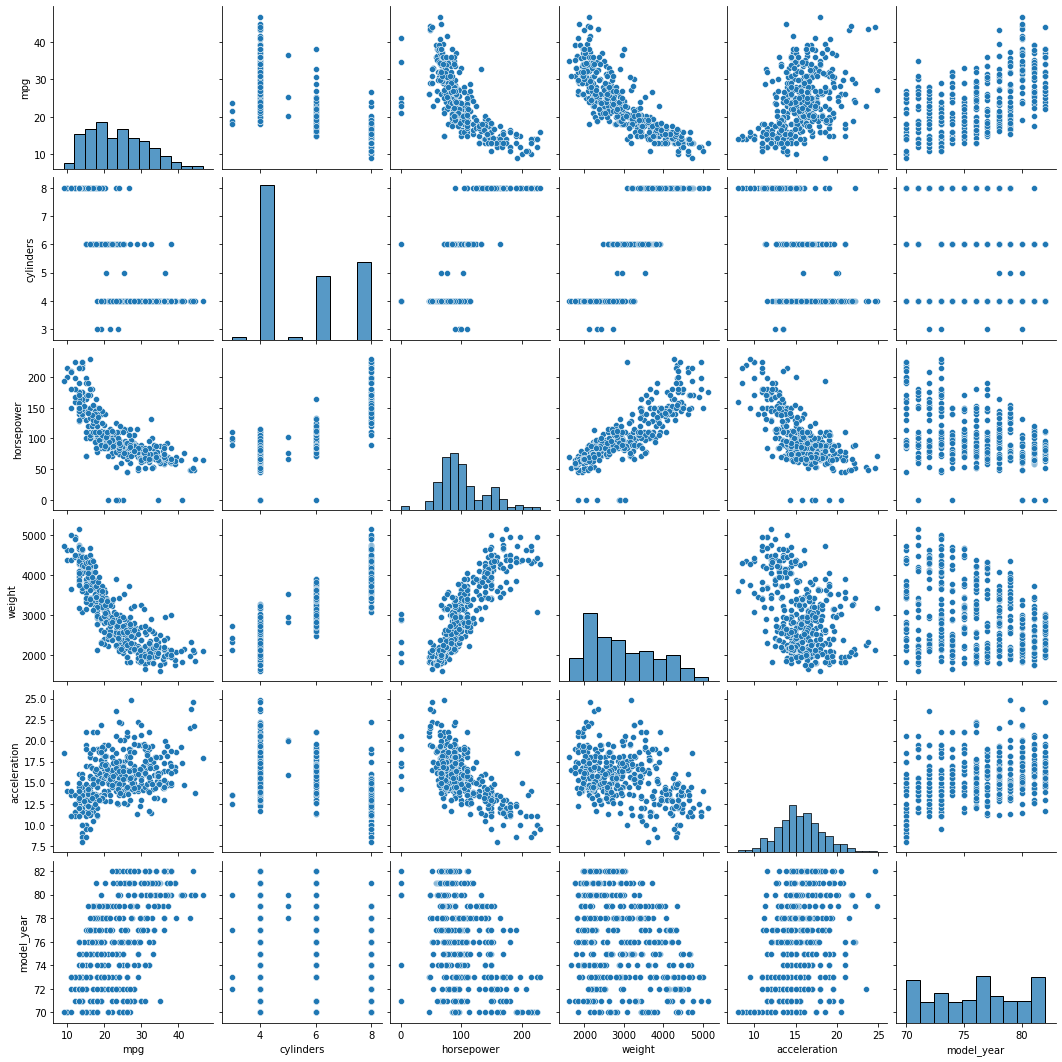

In [5]:
sns.pairplot(dataset)

In [6]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [7]:
dataset = dataset.dropna(subset=['horsepower'])

In [8]:
print(calc_vif(dataset[["mpg","cylinders"]]))

   variables       VIF
0        mpg  3.275633
1  cylinders  3.275633


In [9]:
usa = dataset[dataset['origin'] == 'usa']['mpg']
europe = dataset[dataset['origin'] == 'europe']['mpg']
print("Independent T-Test:", ttest_ind(usa,europe))


Independent T-Test: Ttest_indResult(statistic=-8.914687150324422, pvalue=3.94517347398542e-17)


In [11]:
usa_mpg = dataset[dataset['origin'] == 'usa']['mpg']
usa_acceleration = dataset[dataset['origin'] == 'usa']['acceleration']
print("Paired T-Test:", ttest_rel(usa_mpg,usa_acceleration))


Paired T-Test: Ttest_relResult(statistic=13.430523360027928, pvalue=2.851419727432091e-31)


In [12]:
print("Paired T-Test (Hypothesis):", ttest_rel(usa_mpg,usa_acceleration))

Paired T-Test (Hypothesis): Ttest_relResult(statistic=13.430523360027928, pvalue=2.851419727432091e-31)


In [16]:
print("ANOVA:", stats.f_oneway(dataset['mpg'], dataset['acceleration'], dataset['cylinders']))

ANOVA: F_onewayResult(statistic=1366.500089768972, pvalue=4.363383645155026e-309)
